#**K-Means Clustering**

# **Goal:**
When working with unsupervised learning methods, its usually important to lay out a general goal.

In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend heavily on the domain itself, in this case, marketing.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv(r'/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#**Exploratory Data Analysis**

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [53]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


#**Continuous Feature Analysis**

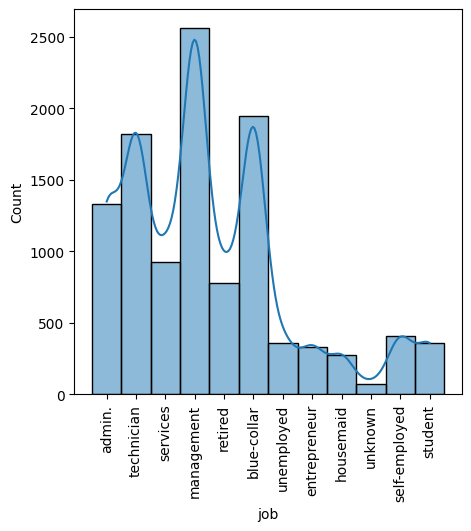

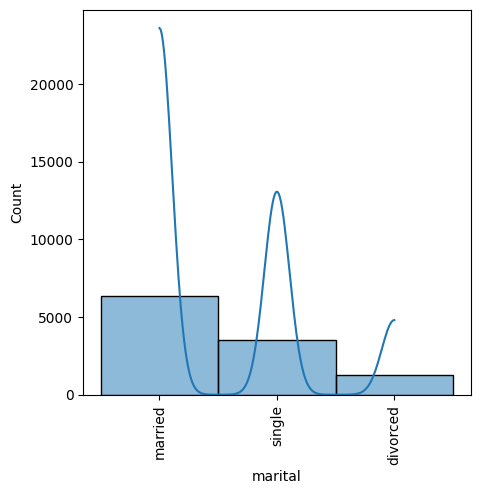

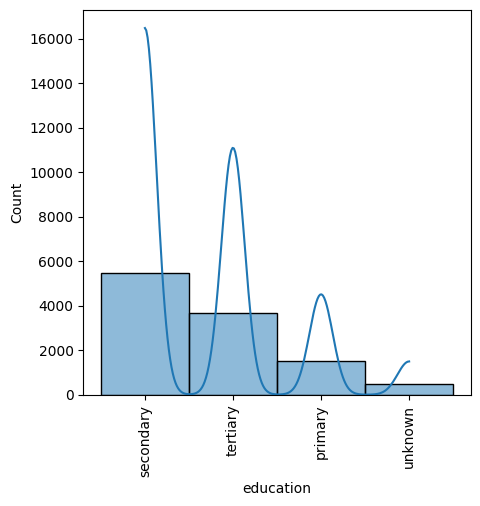

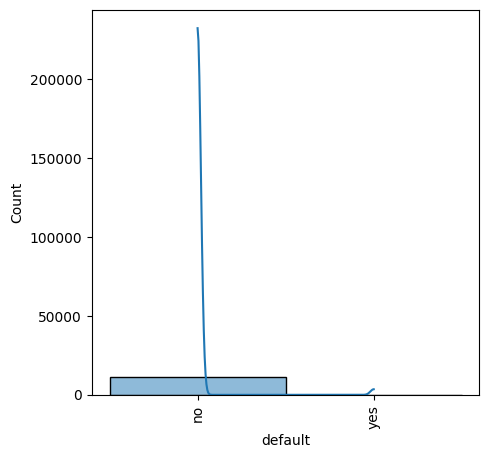

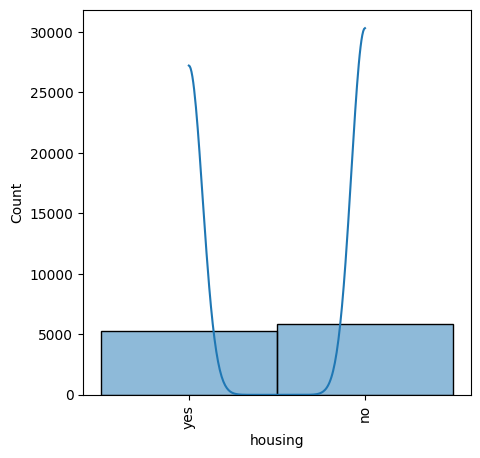

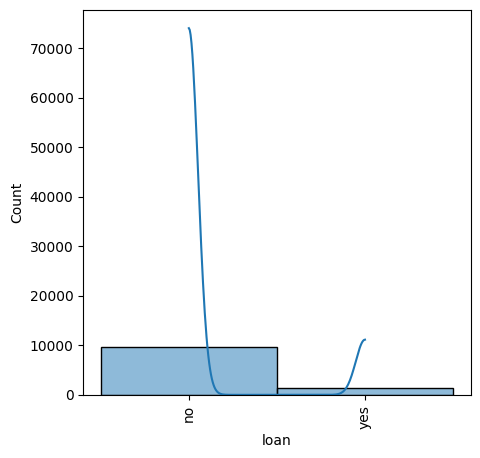

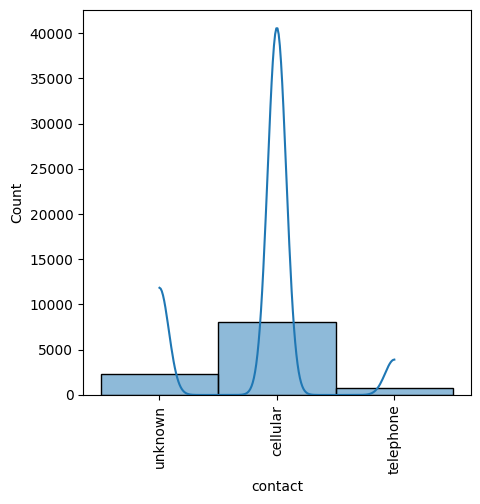

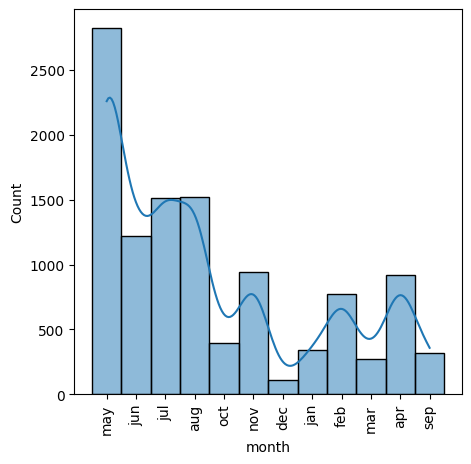

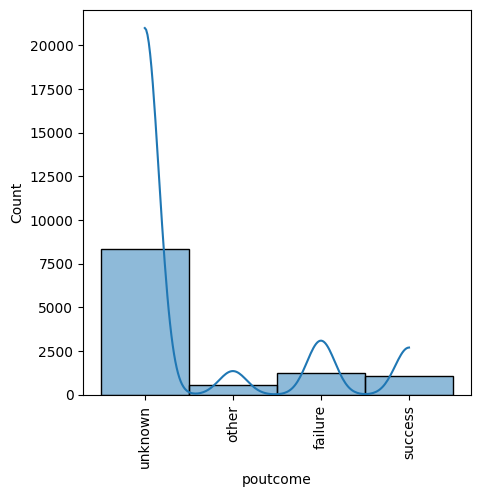

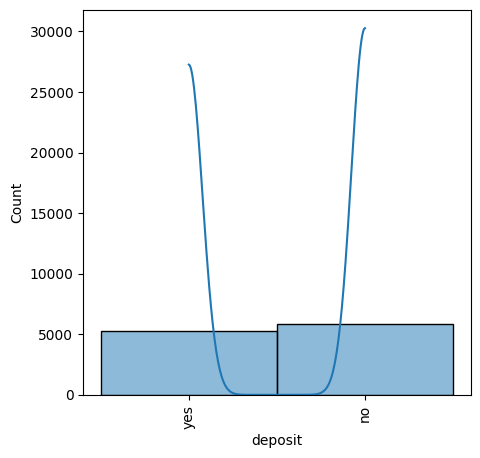

In [57]:
for col in df.columns:
  if df[col].dtype == 'object':
    plt.figure(figsize=(5,5))
    sns.histplot(x=df[col],kde = True)
    plt.xticks(rotation=90)
    plt.show()

In [58]:
obj_col = df.select_dtypes(include = 'object').columns.to_list()
obj_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [59]:
int_col = df.select_dtypes(include = ['int','float']).columns.to_list()
int_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

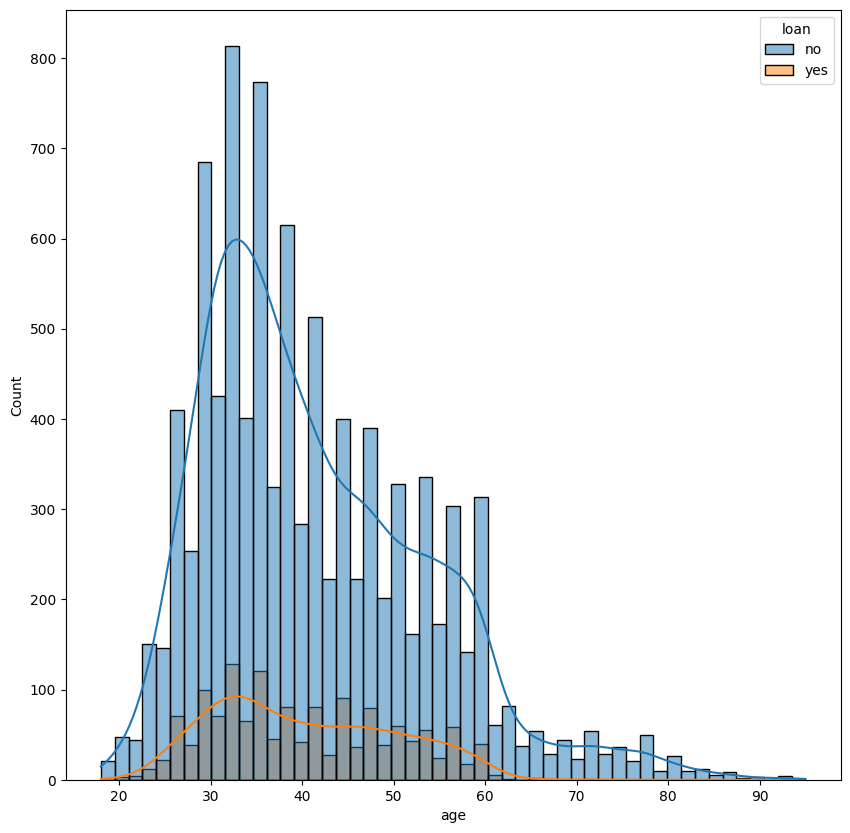

In [60]:
plt.figure(figsize = (10,10))
sns.histplot(data = df,x = 'age',hue = 'loan',kde = True)
plt.show()

There are no right or wrong answer in unsupervised learning.

Example:

 1. If we are marketing for a loan, we might want to not target the people who already had a loan because they might not take another loan.
 2. Or maybe we might want to target the people who already had a loan because they had converted.

We want to see pdays distribution. P day is number of days since they had been contacted by marketing campign. 999 means they had never contacted before.

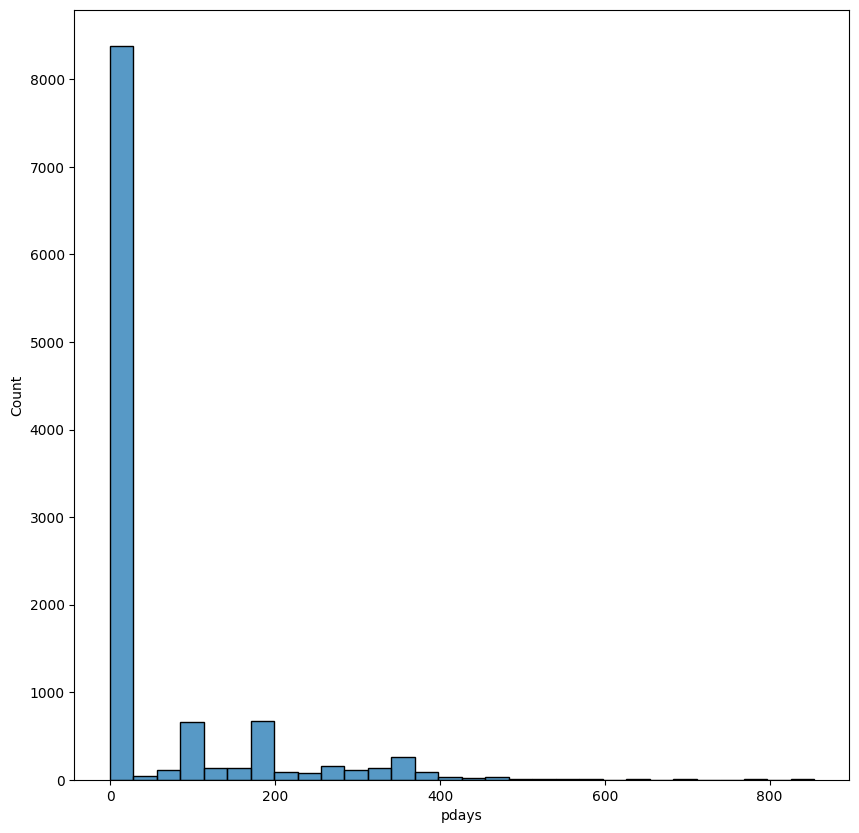

In [61]:
plt.figure(figsize = (10,10))
sns.histplot(data = df,x = 'pdays',bins = 30)
plt.show()

If we look at the above chart, it is quite confusing. So we might want to clean up a little bit more. As most of the people have never been contacted before, there are a lot of people on 1000 side. (999 means a person is never contacted before for marketing purpose).

What we can do is to shrink down the data limit.

11162


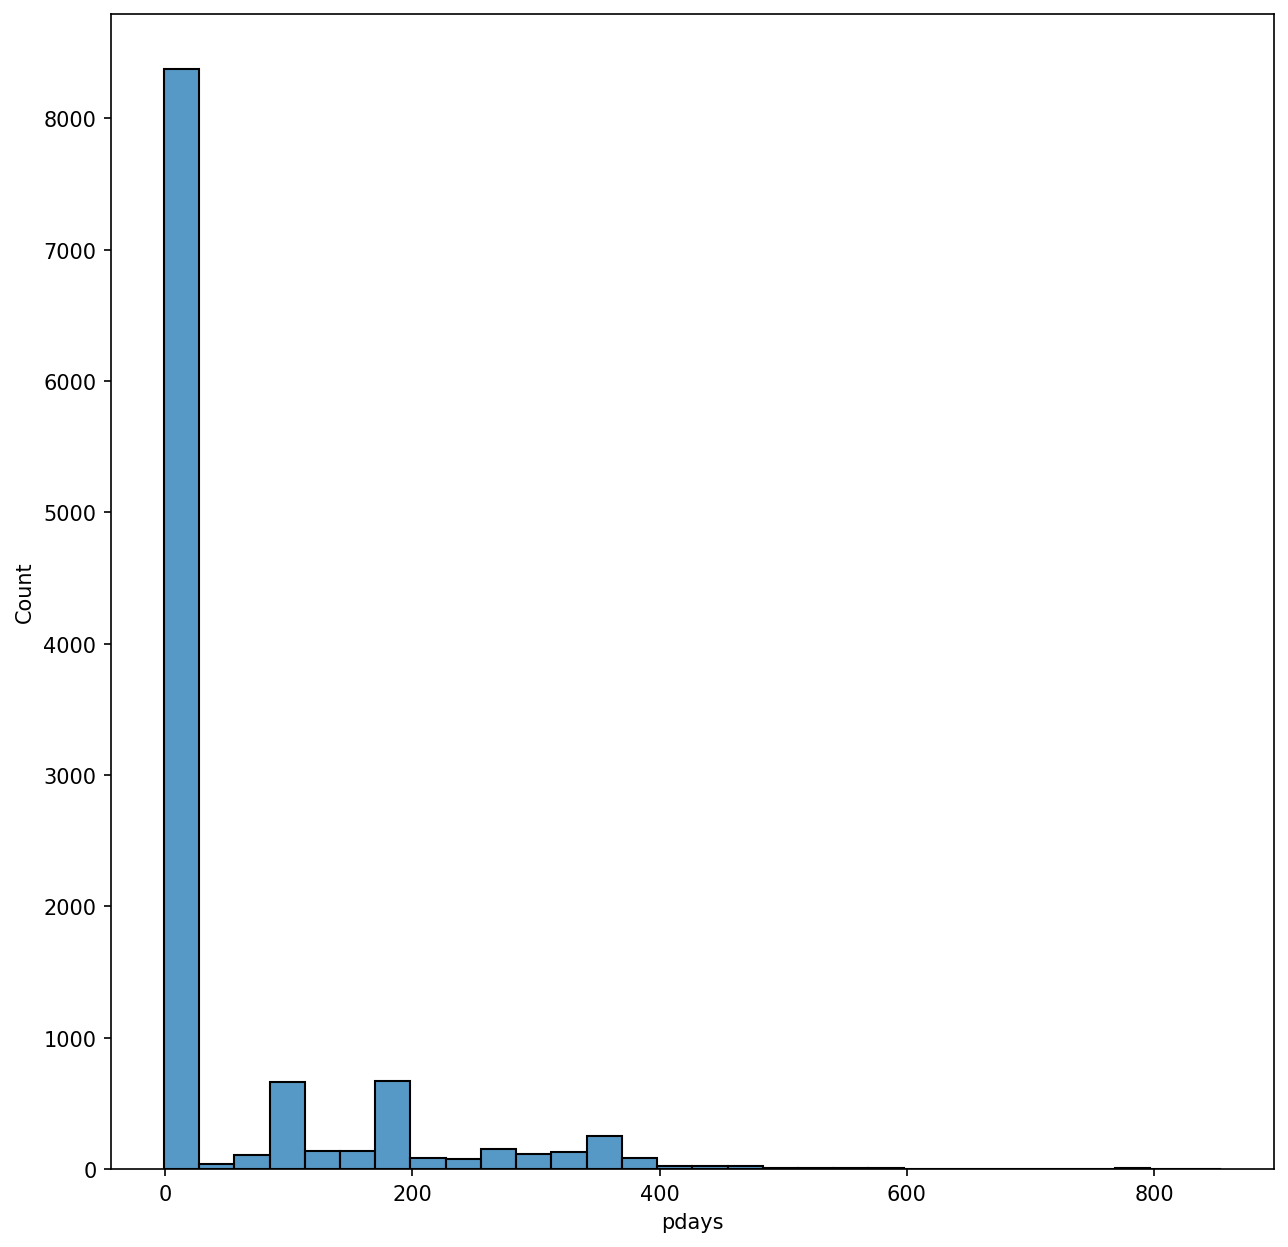

In [62]:
# Filter out those who had contacted yet(999)

not_contacted = df[df['pdays']!=999]
print(len(not_contacted))

plt.figure(figsize = (10,10),dpi = 150)
sns.histplot(data = not_contacted,x = 'pdays',bins = 30)
plt.show()


It seem like most of the people haven't been contacted around 3 to 10 days. However this data only represents people who have contacted before which is a minority among the whole data.

In [63]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Contact duration - contact with customer made, how long did call last?**

In [64]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

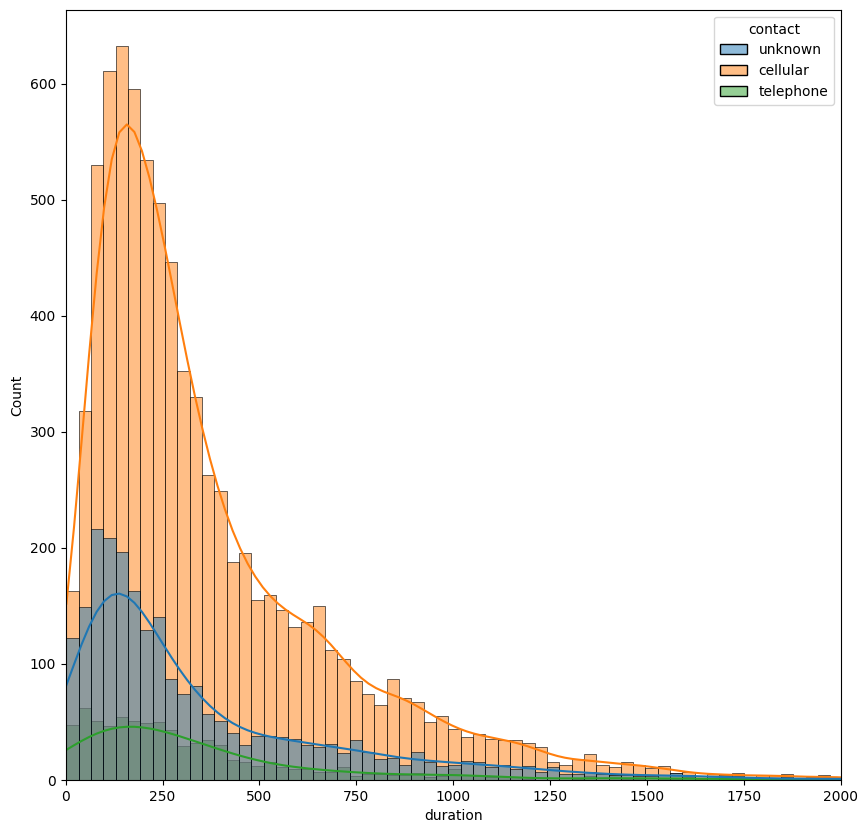

In [65]:
plt.figure(figsize = (10,10))
sns.histplot(data = df,x = 'duration',hue ='contact',kde = True)
plt.xlim(0,2000)
plt.show()

We can see that two distributions ( contacted via landline phone or cell phone) are extremly similar.

Propably more people give cell phone numbers or cellphone is always with us, that's why those data points are much higher than landline ones.

In [66]:
df['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


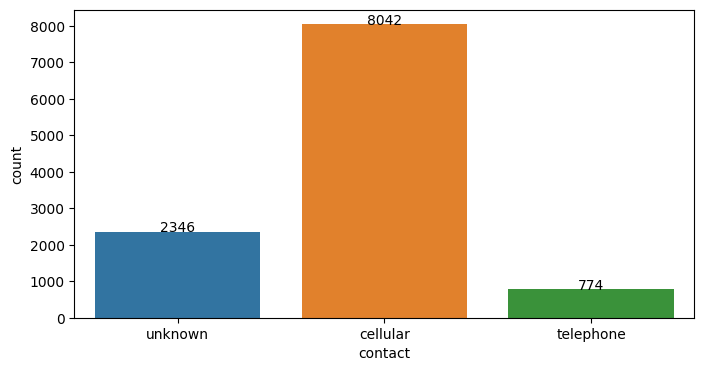

In [67]:
plt.figure(figsize = (8,4))
ax = sns.countplot(data = df,x = 'contact',hue = 'contact')
for p in ax.patches:
  height  = p.get_height()
  x_coord = p.get_x()
  width = p.get_width()
  ax.text(x_coord + width/2,height + 0.1,'{:.0f}'.format(height),ha = 'center')

plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

In [69]:
df['previous'].unique()

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37])

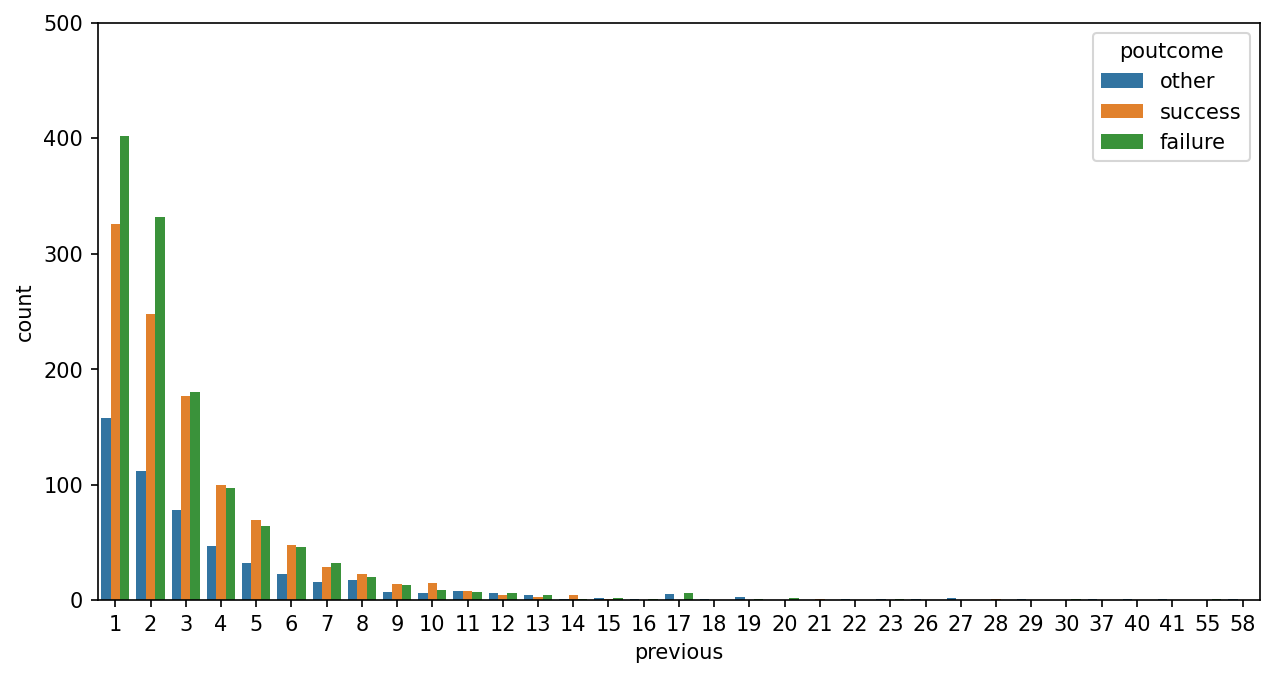

In [70]:
df_filtered = df[df['poutcome'] != 'unknown'].copy()

plt.figure(figsize = (10,5),dpi = 150)
sns.countplot(data = df_filtered,x = 'previous',hue = 'poutcome')
plt.ylim(0,500)
plt.show()

#**Categorical Features**

In [71]:
df.select_dtypes(include = 'object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [72]:
df_col_to_plot = df[['job', 'marital', 'education', 'default']]

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64




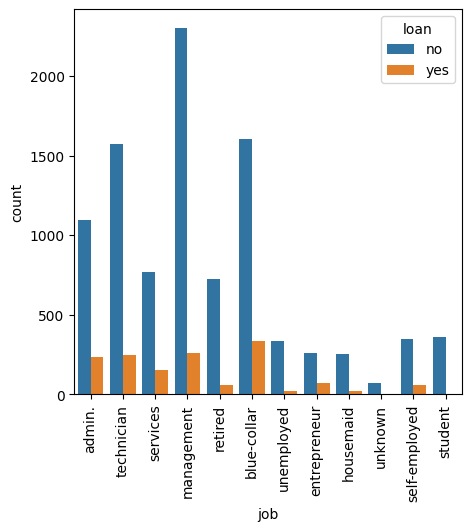

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64




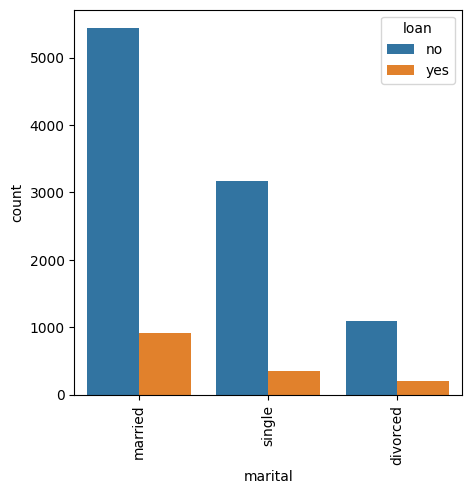

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64




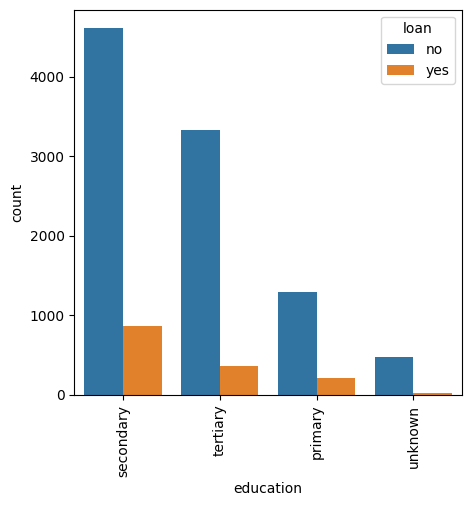

default
no     10994
yes      168
Name: count, dtype: int64




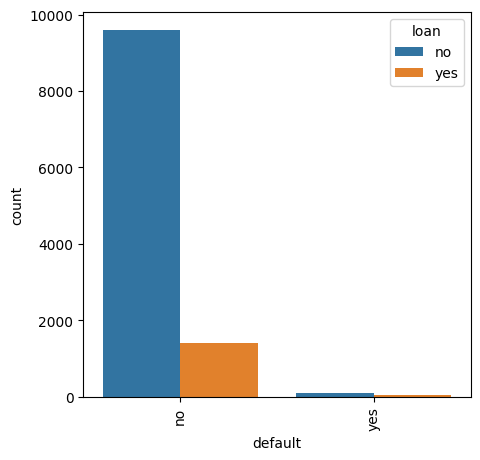

In [73]:
for col in df_col_to_plot:
  if df[col].dtype == 'object':
    print(df[col].value_counts())
    print('\n')
    plt.figure(figsize=(5,5))
    sns.countplot(data = df,x = col,hue = 'loan')
    plt.xticks(rotation = 90)
    plt.show()


#**Clustering**
#**Data Preparation**

In clustering, we can't directly use the categorical variables as everything is based on distance matrix. In Unsupervised learning (Clustering), the distance between the groups are more useful as we need to differentiate across the similar data points.

**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as **scaling the data due to distance being a key factor in clustering.**

NOTE: We also don't need to drop the last column after converting to dummy variables as dummy variable trap doesn't impact in Clustering.

In [74]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Dummyfy the features**

In [75]:
x  = pd.get_dummies(df)
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,5,1042,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,False,True
1,56,45,5,1467,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,False,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,55,2476,5,579,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,54,184,5,673,2,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,False,True,False,...,False,False,False,False,False,False,False,True,True,False
11158,39,733,16,83,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
11159,32,29,19,156,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
11160,43,0,8,9,2,172,5,False,False,False,...,True,False,False,False,True,False,False,False,True,False


**Scaling the data**
 * we need to scale the data as we are dealing with multiple scales of numbers (some are between 0 and 1, some are between 9999 and 0). In Clustering the distance is important and we don't want to distort our data.

We can directly fit_transform() our X as we don't need to worry about data leakage or what so ever as there is no label in the first place.

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.49150488,  0.25252514, -1.26574556, ...,  0.58362637,
        -1.05376366,  1.05376366],
       [ 1.23967567, -0.4599736 , -1.26574556, ...,  0.58362637,
        -1.05376366,  1.05376366],
       [-0.0194704 , -0.0801603 , -1.26574556, ...,  0.58362637,
        -1.05376366,  1.05376366],
       ...,
       [-0.77495804, -0.46493443,  0.39689074, ...,  0.58362637,
         0.9489794 , -0.9489794 ],
       [ 0.14841574, -0.47392593, -0.90946635, ..., -1.71342496,
         0.9489794 , -0.9489794 ],
       [-0.6070719 , -0.47392593, -0.79070662, ...,  0.58362637,
         0.9489794 , -0.9489794 ]])

Creating and Fitting a KMeans Model
Note of our method choices here:

* fit(X[, y, sample_weight])
  - Compute k-means clustering.
* fit_predict(X[, y, sample_weight])

  - Compute cluster centers and predict cluster index for each sample.
* fit_transform(X[, y, sample_weight])

  - Compute clustering and transform X to cluster-distance space.
* predict(X[, sample_weight])

  - Predict the closest cluster each sample in X belongs to.

In [78]:
from sklearn.cluster import KMeans

In [79]:
model = KMeans(n_clusters = 3)

At this point, we don't really know 3 is the correct choice for n_clusters. But it is a good starting point as we can assume for markerting, there is a group of people who want to be markerted and another group who doesn't.

In [80]:
## similar to doing fit_transform, doing two tasks at once.
cluster_label = model.fit_predict(x_scaled)
print(cluster_label)
len(cluster_label)

[1 1 1 ... 2 2 1]


11162

In [81]:
#Now we can join the cluster labels back to original datasets.
x['Clusters'] = pd.Series(cluster_label,index = x.index)

In [82]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,Clusters
0,59,2343,5,1042,1,-1,0,True,False,False,...,False,False,False,False,False,False,True,False,True,1
1,56,45,5,1467,1,-1,0,True,False,False,...,False,False,False,False,False,False,True,False,True,1
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,True,1
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,True,1
4,54,184,5,673,2,-1,0,True,False,False,...,False,False,False,False,False,False,True,False,True,1


**How can we interpret this ?**
 * one way is to check correlation between the features and cluster assignment.

In [83]:
x.shape

(11162, 54)

In [87]:
x.corr()['Clusters'].iloc[:-1].sort_values(ascending = False)

,Clusters
contact_cellular,0.422963
housing_no,0.371459
deposit_yes,0.358438
pdays,0.311326
month_aug,0.258842
previous,0.248522
poutcome_success,0.231747
poutcome_failure,0.221136
education_tertiary,0.217891
loan_no,0.200456


We can see that subscired_noand subscried_yes are perfect images of values. This makes sense as we dummyfy subscribed feature. This won't impact the model prediction.

But we need to take note of those while we are reporting data analysis.

<Axes: >

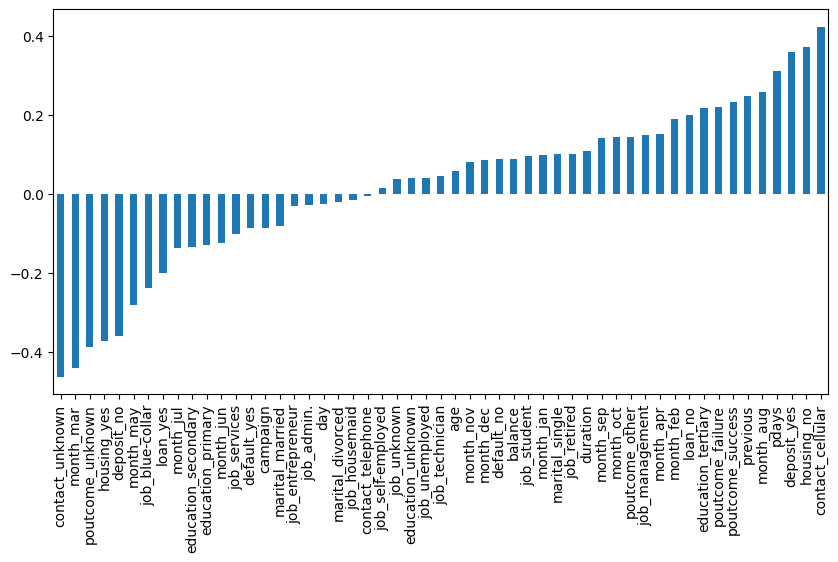

In [92]:
plt.figure(figsize = (10,5))
x.corr()['Clusters'].iloc[:-1].sort_values().plot(kind = 'bar')

# **Choosing K Value**
In the above correlation, we can see the corelation between features and assigned cluster.

However it doesn't tell us chosen K-value is the best or not.

For this reason, we will use Elbow method.

In [93]:
ssd = []

for k in range(2,10):
  model = KMeans(n_clusters = k)
  model.fit(x_scaled)

  #Sum of squared distances of samples to their closest cluster center.
  ssd.append(model.inertia_)

In [94]:
ssd

[558466.1658810928,
 542066.6235622677,
 514089.92366338073,
 505237.4285651904,
 492842.4483423973,
 466534.56870602746,
 460065.6947765582,
 461594.21718525153]

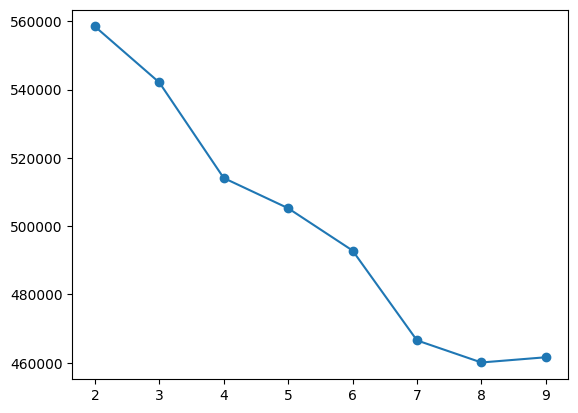

In [96]:
plt.plot(range(2,10),ssd,marker = 'o')
plt.show()

We can see that there is slight reduction at 4.

#**Analyzing SSE Reduction**

In [97]:
pd.Series(ssd)

,0
0,558466.165881
1,542066.623562
2,514089.923663
3,505237.428565
4,492842.448342
5,466534.568706
6,460065.694777
7,461594.217185


Using pandas, we can easily calculate the difference between one point and subsequence point.

In [98]:
pd.Series(ssd).diff()

,0
0,NaN
1,-16399.542319
2,-27976.699899
3,-8852.495098
4,-12394.980223
5,-26307.879636
6,-6468.873929
7,1528.522409


Take note that the indexes number are not directly applicable as K-Value as these are just difference between rows. So index 1 is difference between K-Value 1 and 2... etc.

<Axes: >

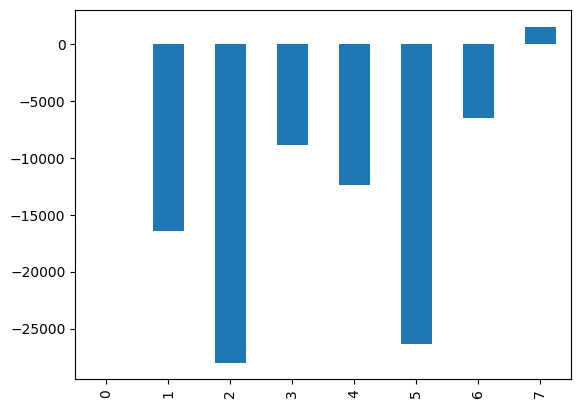

In [99]:
pd.Series(ssd).diff().plot(kind = 'bar')